In [1]:
#pip install pytesseract


In [2]:
import pytesseract
from PIL import Image
import cv2
import re
import matplotlib.pyplot as plt

In [51]:
# Chemin vers l'exécutable Tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\efiom\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Chemin vers l'image téléchargée
image_path = 'C:/Users/efiom/Desktop/Outils/Projets/AbbaTechnlogy/donnees/image_dir/PHOTO-2024-07-19-12-24-06 2.jpg'
image = cv2.imread(image_path)

# Conversion en format PIL pour Tesseract, car tessract ne peut que lire les type dimage pris en charge par PIL(Python Imagination Library)
pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Extraction du texte
text = pytesseract.image_to_string(pil_image)
print(text)

ARIAS HOLDING

Driven by Innovation °

Zouhair Ridouane
CEO

+34 657 177 438

zouhair@ariasc.com

www.ariasholding.com

Arias Corp. Calle Principe
de Vergara, 109, 2a Planta,
28002.Madrid, SPAIN




In [52]:
#extraction des information specifiques
def extract_info(text):
    email_pattern= r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    phone_pattern= r'\(?\+?[0-9]*\)?[0-9_\- \(\)]{5,}'
    url_pattern = r'(https?://\S+|www\.\S+)'

    email_matches= re.findall(email_pattern, text) #chercher tous les caractères sous cette forme de ..._pattern
    phone_matches= re.findall(phone_pattern, text)
    url_matches= re.findall(url_pattern, text)

    emails= list(set(email_matches)) #remove duplicates
    phones= list(set(phone_matches))
    urls= list(set(url_matches))

    #exemple simple pour extraire un nom(premiere logne non vide)
    name= text.split('\n')[0].strip()

    #trouver l'adresse (exemple simplifié, en supposant qu'elle se trouve après le nom)
    address_lines=[]
    for line in text.split('\n'):
        if re.match(r'[A-Za-z]', line) and not re.match(name, line) and not re.match(email_pattern, line) and not re.match(phone_pattern, line) and not re.match(url_pattern, line):
            address_lines.append(line.strip())
    address= ' '.join(address_lines)

    return name, emails, phones, urls, address

name, emails, phones, urls, address = extract_info(text) #appel a la fonciton 
print("Name: ", name)
print("Email:", emails)
print("Phone: ", phones)
print("URL: ", urls)
print("Address: ", address)


Name:  ARIAS HOLDING
Email: ['zouhair@ariasc.com']
Phone:  ['28002', '+34 657 177 438']
URL:  ['www.ariasholding.com']
Address:  Driven by Innovation ° Zouhair Ridouane CEO Arias Corp. Calle Principe de Vergara, 109, 2a Planta,


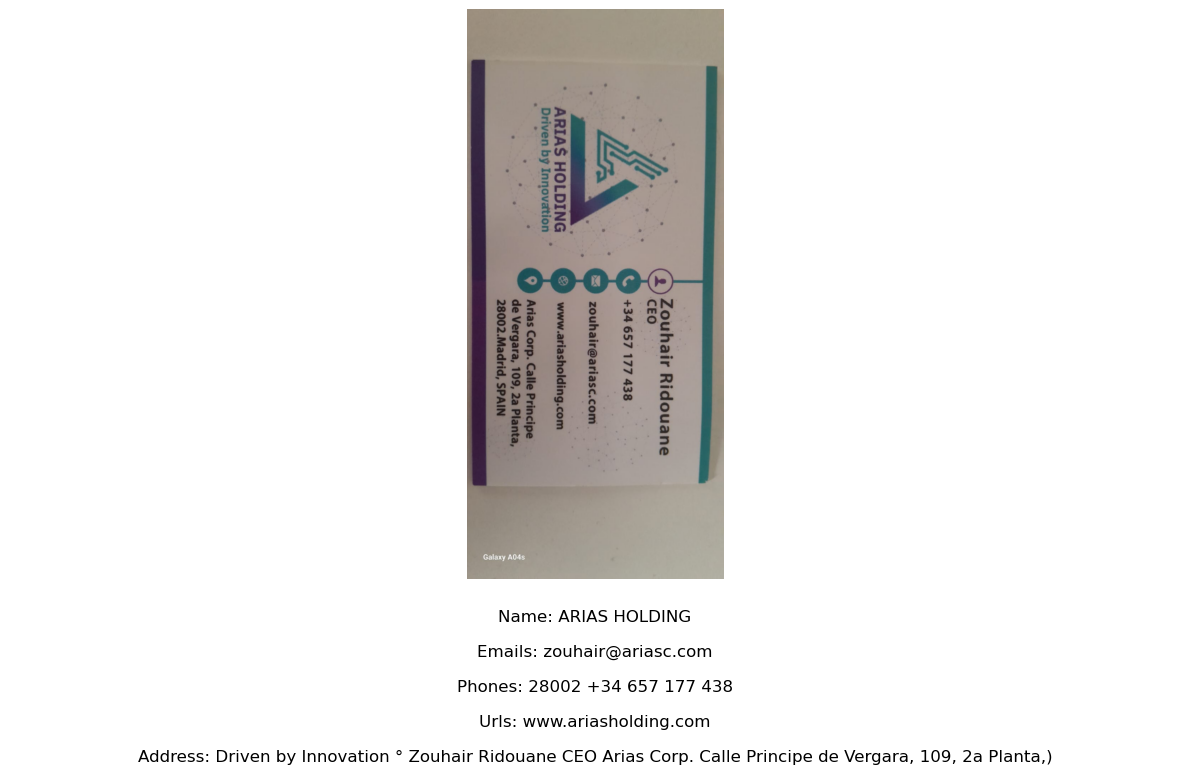

In [53]:
#Affichage des information sur l'image
def display_info_below_image(image, name, emails, phones, urls, address):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [4,1]})

    #lire l'image
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].axis('off')

    #afficher les informations sur la carte
    info_text= f"Name: {name}\n\nEmails: {' '.join(emails)}\n\nPhones: {' '.join(phones)}\n\nUrls: {' '.join(urls)}\n\nAddress: {address})"
    ax[1].text(0.5, 0.5, info_text, fontsize=12, ha='center', va='center')
    ax[1].axis('off')

    

    plt.tight_layout()
    plt.show()

display_info_below_image(image, name, emails, phones, urls, address)